# pre-processing

In [2]:
#enable autocomplete
%config IPCompleter.greedy=True 

#load packages
import sys #access to system parameters
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load data
file_path = r"titanic_train.csv"
data = pd.read_csv(file_path)

In [4]:
#complete missing age with median
data['Age'].fillna(data['Age'].median(), inplace = True)

#complete missing fare with median
data['Fare'].fillna(data['Fare'].median(), inplace = True)

#complete embarked with mode
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace = True)

#complete Cabin with mode
data['Cabin'].fillna(data['Cabin'].mode()[0], inplace = True)

### 3) creating new features for analysis

In [5]:
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

data['IsAlone'] = 1 #initialize to yes/1 is alone
data['IsAlone'].loc[data['FamilySize'] > 1] = 0

C:\Users\zigi\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


### 4) converting fields to the correct format for calculations and presentation

## Feature Extraction from Object Column

In [6]:
def my_regex(x):
    try:
        num = re.search(r'[0-9]+',x)
        return num.group(0)
    except:
        return 0
    return 

data['Cabin Num'] = data.Cabin.apply(lambda x : my_regex(x))    
#data.head()  

# Model Data

## 3.25 Split Training and Testing Data

In [7]:
x = data[['Cabin Num','IsAlone','FamilySize','Parch','SibSp','Age']]

y = data.Survived

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

# Applied Different Algorithm

# Decision Tree

In [8]:
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree = decision_tree.fit(x_train, y_train)

y_pred_train = decision_tree.predict(x_train)
y_pred_test = decision_tree.predict(x_test)

from sklearn.metrics import accuracy_score
print("train accuracy - " + str(accuracy_score(y_train, y_pred_train)))

print("test accuracy - " + str(accuracy_score(y_test, y_pred_test)))

train accuracy - 0.7908611599297012
test accuracy - 0.6033519553072626


In [9]:
decision_tree = DecisionTreeClassifier(max_depth = 5 , min_samples_split = 0.1 , min_samples_leaf = 0.05 , max_features = 0.05)
decision_tree = decision_tree.fit(x_train, y_train)

y_pred_train = decision_tree.predict(x_train)
y_pred_test = decision_tree.predict(x_test)

from sklearn.metrics import accuracy_score
print("train accuracy - " + str(accuracy_score(y_train, y_pred_train)))

print("test accuracy - " + str(accuracy_score(y_test, y_pred_test)))

train accuracy - 0.6572934973637962
test accuracy - 0.6424581005586593


## Random Forest

In [10]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100,max_depth = 5 , min_samples_split = 0.1 , min_samples_leaf = 0.05 , max_features = 0.05)
random_forest = random_forest.fit(x_train, y_train)

y_pred_train = random_forest.predict(x_train)
y_pred_test = random_forest.predict(x_test)


print("train accuracy - " + str(accuracy_score(y_train, y_pred_train)))

print("test accuracy - " + str(accuracy_score(y_test, y_pred_test)))



train accuracy - 0.6660808435852372
test accuracy - 0.6424581005586593


# Evaluate Model Performance

## Evaluate Model Performance - confusion matrix

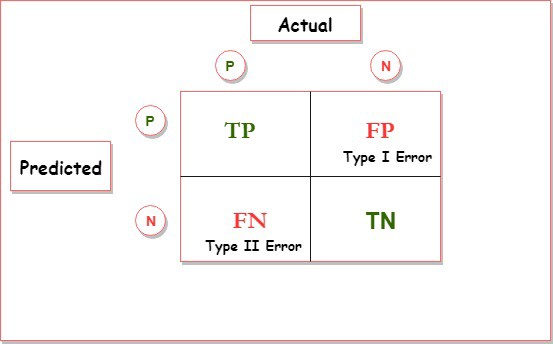

In [11]:
from IPython.display import Image
Image(filename='confusion matrix.jpeg')

## Evaluate Model Performance - recall precision and f1_score

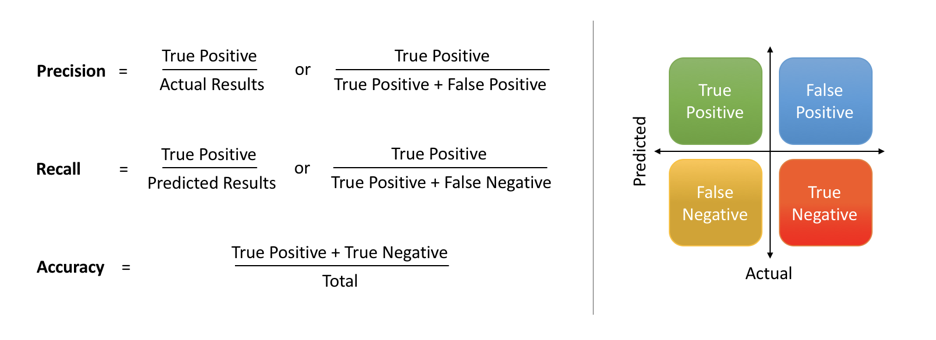

In [12]:
Image(filename='recall_precision_accuracy.png')

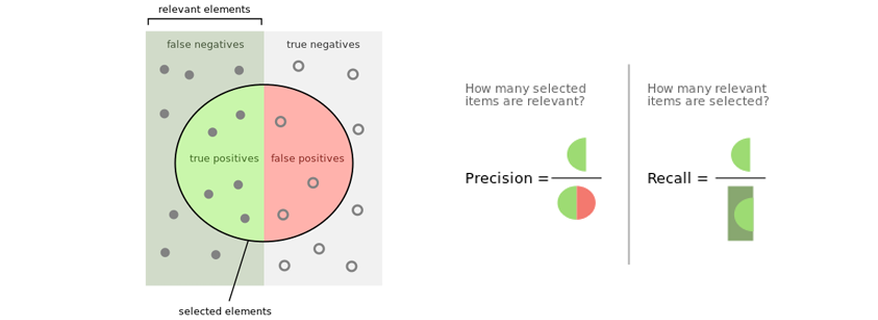

In [13]:
Image(filename='recall_precision.png')

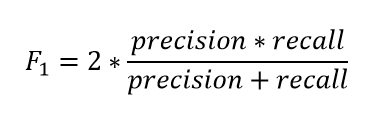

In [14]:
Image(filename='f1_score.png')

## Evaluate Model Performance - ROC , AUC

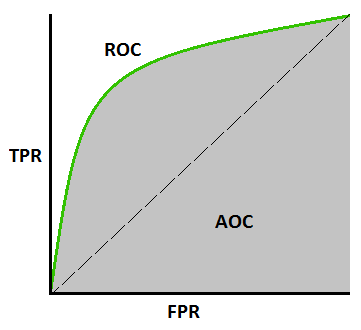

In [15]:
Image(filename='ROC Curve.png')

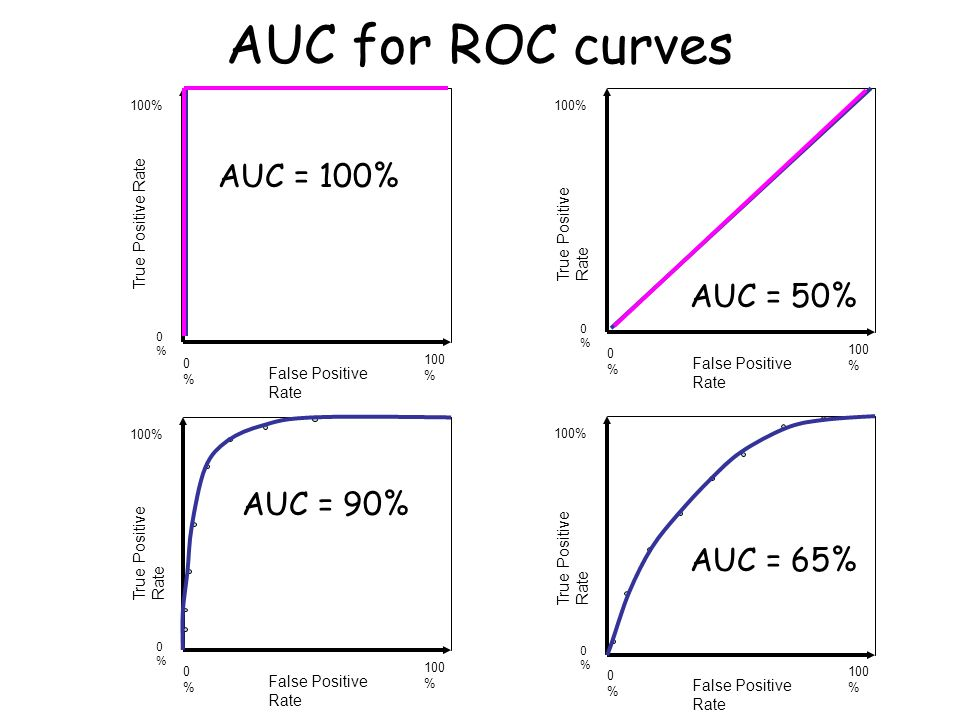

In [16]:
Image(filename='auc.jpg')

## Evaluate Model Performance - Implementation

In [17]:
random_forest = RandomForestClassifier(n_estimators=1000,max_depth = 5 , min_samples_split = 0.1 , min_samples_leaf = 0.05 , max_features = 0.05)
random_forest = random_forest.fit(x_train, y_train)

y_pred_train = random_forest.predict(x_train)
y_pred_test = random_forest.predict(x_test)
y_pred_val = random_forest.predict(x_val)



print("train accuracy - " + str(accuracy_score(y_train, y_pred_train)))

print("test accuracy - " + str(accuracy_score(y_test, y_pred_test)))

print("val accuracy - " + str(accuracy_score(y_val, y_pred_val)))

train accuracy - 0.680140597539543
test accuracy - 0.6759776536312849
val accuracy - 0.6923076923076923


In [18]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_val, y_pred_val))
tn, fp, fn, tp = confusion_matrix(y_val, y_pred_val).ravel()

[[86 12]
 [32 13]]


In [19]:
from sklearn.metrics import precision_score
precision_score(y_val, y_pred_val)

0.52

In [20]:
from sklearn.metrics import recall_score
recall_score(y_val, y_pred_val) 

0.28888888888888886

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val, y_pred_val)

0.6923076923076923

In [22]:
from sklearn.metrics import f1_score
f1_score(y_val, y_pred_val)  

0.3714285714285714

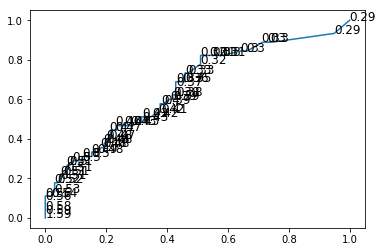

In [23]:
from sklearn import metrics
y_score = random_forest.predict_proba(x_val)

fpr, tpr, thresholds = metrics.roc_curve(y_val, y_score[:,1])
plt.plot(fpr, tpr)
for i in range(len(fpr)):
    plt.text(round(fpr[i],2), round(tpr[i],2), round(thresholds[i],2), fontsize=12)
plt.show()

In [24]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_val, y_score[:,1])
f1_score_ = 2*(precision*recall)/(precision+recall)

index_of_max_f1_score = np.argmax(f1_score_)

thresholds_of_max_f1_score = thresholds[index_of_max_f1_score]
print(thresholds_of_max_f1_score)

0.3168675174472892


In [25]:
mask = y_score[:,1] > thresholds_of_max_f1_score
new_y_pred = y_score
new_y_pred[mask,1] = 1
new_y_pred[~mask,1] = 0

from sklearn.metrics import f1_score
f1_score(y_val, y_pred_val)  

print("f1_score before roc curve - " + str(f1_score(y_val.values, y_pred_val)))

print("f1_score after roc curve - " + str(f1_score(y_val, new_y_pred[:,1])))

f1_score before roc curve - 0.3714285714285714
f1_score after roc curve - 0.5384615384615384
